In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv",index_col="PassengerId")
gender_submission = pd.read_csv("gender_submission.csv")

In [14]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
notSurv, surv = np.bincount(train['Survived'])
total = notSurv + surv
print('Examples:\n    Total: {}\n    Survived: {} ({:.2f}% of total)\n'.format(
    total, surv, 100 * surv / total))

Examples:
    Total: 891
    Survived: 342 (38.38% of total)



In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


## eda

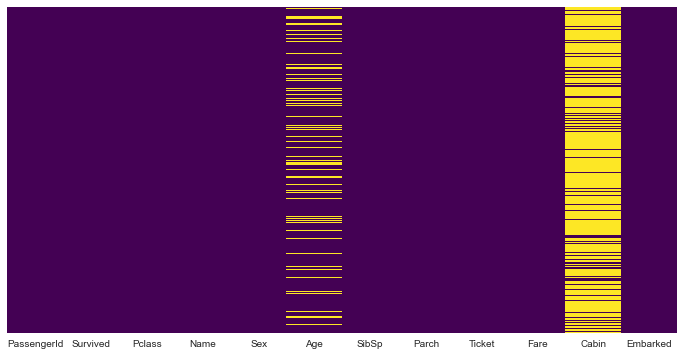

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [18]:
def show_na(df):
    figsize=(12,6)
    plt.figure(figsize=figsize)
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
    plt.show()
    print(df.isnull().sum())
show_na(train)

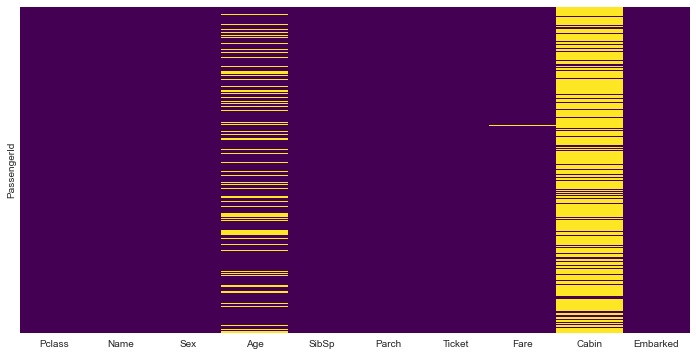

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [19]:
show_na(test)

In [20]:
Fare=test["Fare"]

<AxesSubplot:xlabel='Survived', ylabel='count'>

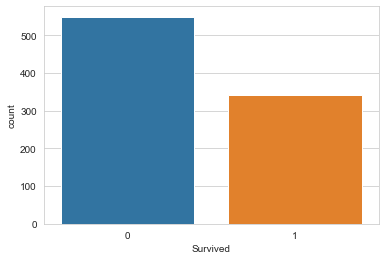

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

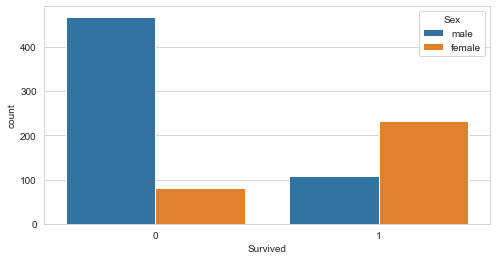

In [22]:
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

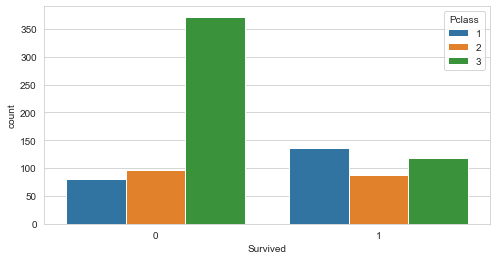

In [23]:
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

<AxesSubplot:>

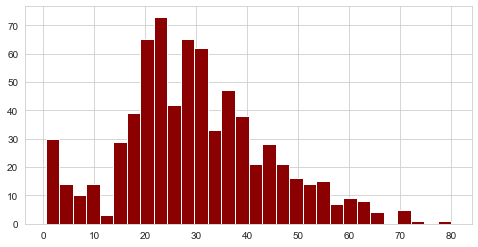

In [24]:
plt.figure(figsize=(8,4))
train['Age'].hist(bins=30,color='darkred')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

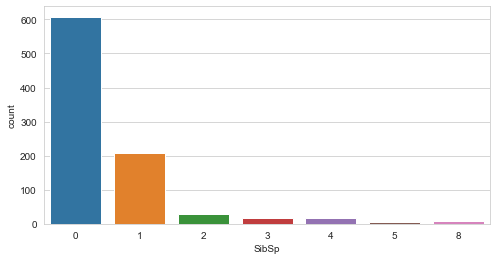

In [25]:
plt.figure(figsize=(8,4))
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

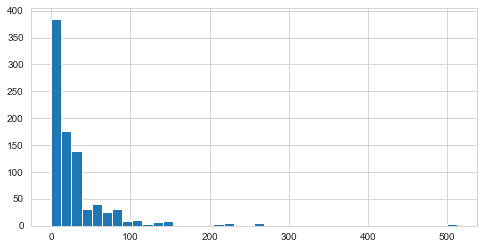

In [26]:
plt.figure(figsize=(8,6))
train['Fare'].hist(bins=40,figsize=(8,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

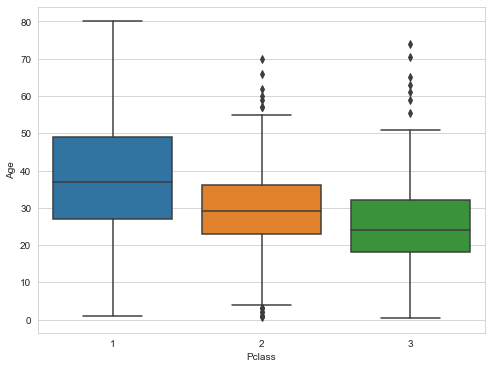

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass',y='Age',data=train)

In [28]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

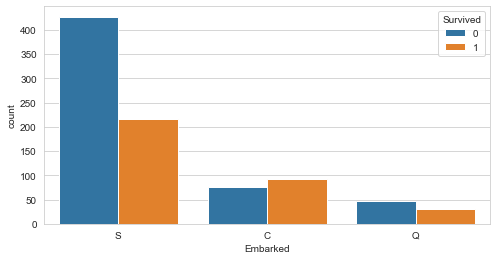

In [29]:
plt.figure(figsize=(8,4))
sns.countplot(x="Embarked",data=train,hue="Survived")

<AxesSubplot:xlabel='Age', ylabel='count'>

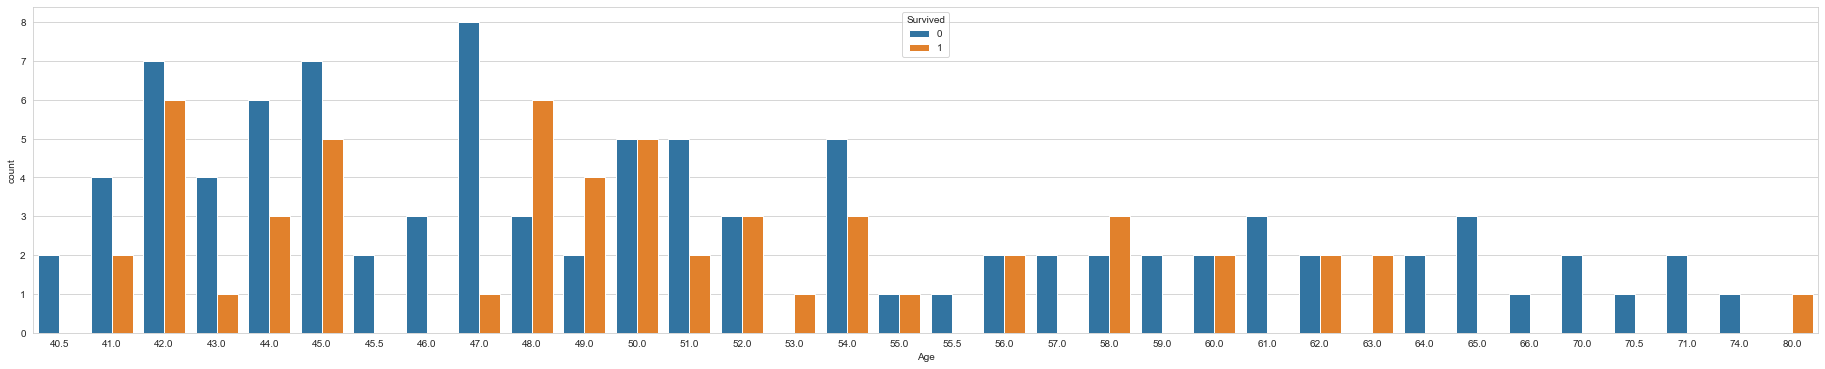

In [30]:
plt.figure(figsize=(32,6))
sns.countplot(x="Age",data=train[train["Age"]>40],hue="Survived")

<AxesSubplot:xlabel='Age', ylabel='count'>

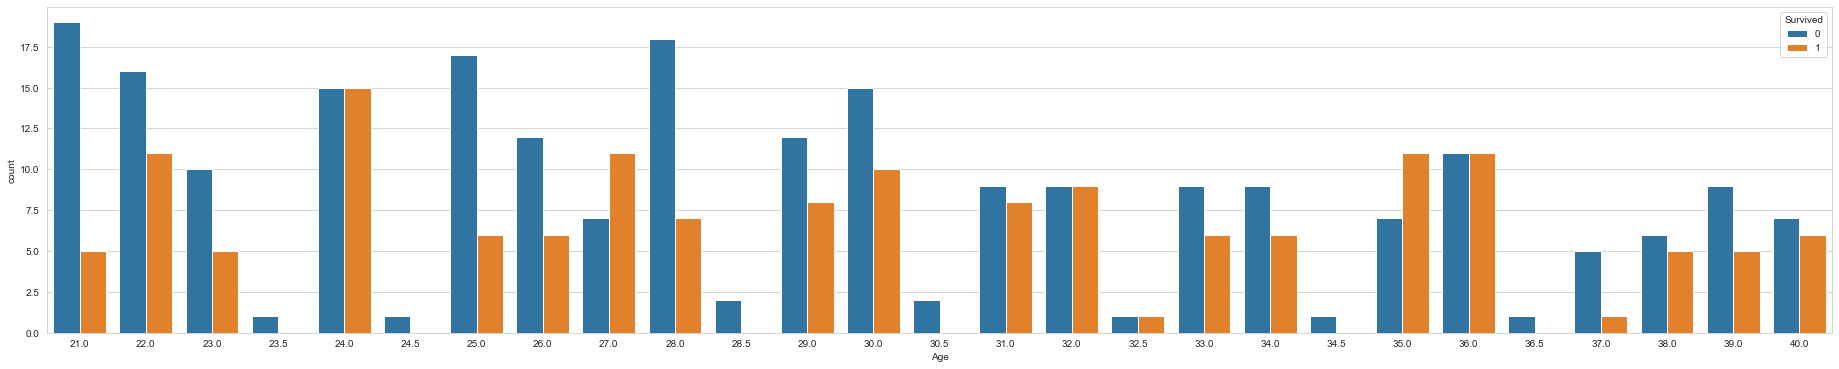

In [31]:
plt.figure(figsize=(32,6))
sns.countplot(x="Age",data=train[(train["Age"]>=21) & (train["Age"]<=40) ],hue="Survived")

<AxesSubplot:xlabel='Age', ylabel='count'>

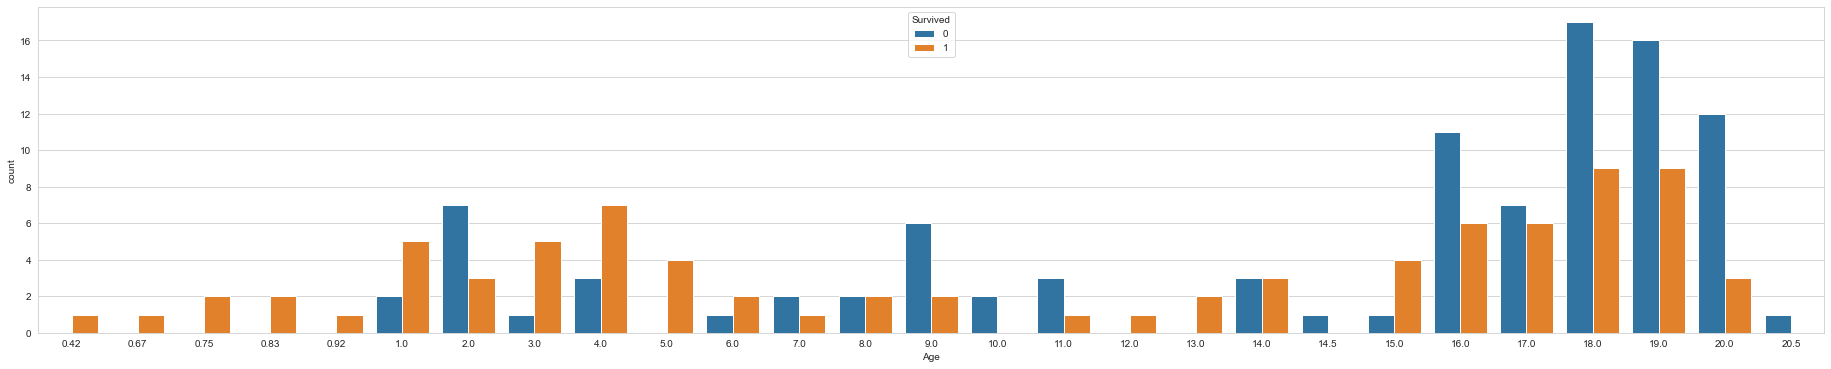

In [32]:
plt.figure(figsize=(32,6))
sns.countplot(x="Age",data=train[train["Age"]<21],hue="Survived")

In [33]:
not_null_cabin = train[train["Cabin"].notna()]
not_null_cabin_test = test[test["Cabin"].notna()]

In [34]:
cabin = pd.concat([not_null_cabin,not_null_cabin_test])
cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2.0,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4.0,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7.0,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11.0,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12.0,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1296,NaN,NaN,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
1297,NaN,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
1299,NaN,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
1303,NaN,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [35]:
import random
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()

In [37]:
def cabin_fillna(cabin,train,test):
    cabin_1=cabin[cabin["Pclass"] == 1]["Cabin"].to_numpy().tolist()
    cabin_2=cabin[cabin["Pclass"] == 2]["Cabin"].to_numpy().tolist()
    cabin_3=cabin[cabin["Pclass"] == 3]["Cabin"].to_numpy().tolist()
    random.shuffle(cabin_1)
    random.shuffle(cabin_2)
    random.shuffle(cabin_3)
    for row in train.index:
        if type(train["Cabin"].loc[row])==np.float:
            if train["Pclass"].loc[row]==1:
                train["Cabin"].loc[row]=random.choice(cabin_1)
            elif train["Pclass"].loc[row]==2:
                train["Cabin"].loc[row]=random.choice(cabin_2)
            else:
                train["Cabin"].loc[row]=random.choice(cabin_3)
        else:
            pass
    for row in test.index:
        if type(test["Cabin"].loc[row])==np.float:
            if test["Pclass"].loc[row]==1:
                test["Cabin"].loc[row]=random.choice(cabin_1)
            elif test["Pclass"].loc[row]==2:
                test["Cabin"].loc[row]=random.choice(cabin_2)
            else:
                test["Cabin"].loc[row]=random.choice(cabin_3)
        else:
            pass
    #cabin_dict = dict(zip(cabin["Cabin"].unique().tolist(),range(186)))
    #train=train.replace(cabin_dict.keys(),cabin_dict.values())
    #test=test.replace(cabin_dict.keys(),cabin_dict.values())
    train["Cabin"] = le.fit_transform(train["Cabin"])
    test["Cabin"] = le.fit_transform(test["Cabin"])

    
    return train , test

In [38]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


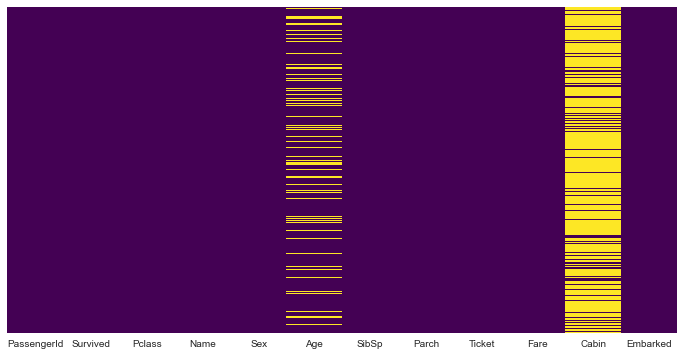

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [39]:
show_na(train)

In [40]:
train["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

## some feature engineering

In [41]:
train[["Age","Pclass"]].groupby("Pclass").mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [42]:
train[["Age","Pclass"]].groupby("Pclass").mean().values[0][0]

38.233440860215055

In [43]:
train["SibSp"] + train["Parch"]

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [44]:
train.index

RangeIndex(start=0, stop=891, step=1)

In [45]:
train["relatives"]="nan"
train["travelled_alone"]="nan"
for row in train.index:
    train["relatives"].loc[row] = train["SibSp"].loc[row] + train["Parch"].loc[row]
    
    if train["relatives"].loc[row]>0:
        train["travelled_alone"].loc[row] = "Yes"
    elif train["relatives"].loc[row]== 0:
        train["travelled_alone"].loc[row] = "No"

C:\Users\memin\AppData\Local\Temp\ipykernel_16748\2015402121.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["relatives"].loc[row] = train["SibSp"].loc[row] + train["Parch"].loc[row]
C:\Users\memin\AppData\Local\Temp\ipykernel_16748\2015402121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["travelled_alone"].loc[row] = "Yes"
C:\Users\memin\AppData\Local\Temp\ipykernel_16748\2015402121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [46]:
test["relatives"]="nan"
test["travelled_alone"]="nan"
for row in test.index:
    test["relatives"].loc[row] = test["SibSp"].loc[row] + test["Parch"].loc[row]
    
    if test["relatives"].loc[row]>0:
        test["travelled_alone"].loc[row] = "Yes"
    elif test["relatives"].loc[row]== 0:
        test["travelled_alone"].loc[row] = "No"

C:\Users\memin\AppData\Local\Temp\ipykernel_16748\2116142244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["relatives"].loc[row] = test["SibSp"].loc[row] + test["Parch"].loc[row]
C:\Users\memin\AppData\Local\Temp\ipykernel_16748\2116142244.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["travelled_alone"].loc[row] = "No"
C:\Users\memin\AppData\Local\Temp\ipykernel_16748\2116142244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [47]:
train["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [48]:
def age(column):
    Age = column[0]
    Pclass = column[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return train[["Age","Pclass"]].groupby("Pclass").mean().values[0][0]

        elif Pclass == 2:
            return train[["Age","Pclass"]].groupby("Pclass").mean().values[1][0]

        else:
            return train[["Age","Pclass"]].groupby("Pclass").mean().values[2][0]

    else:
        return Age

In [49]:
train['Age'] = train[['Age','Pclass']].apply(age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(age,axis=1)

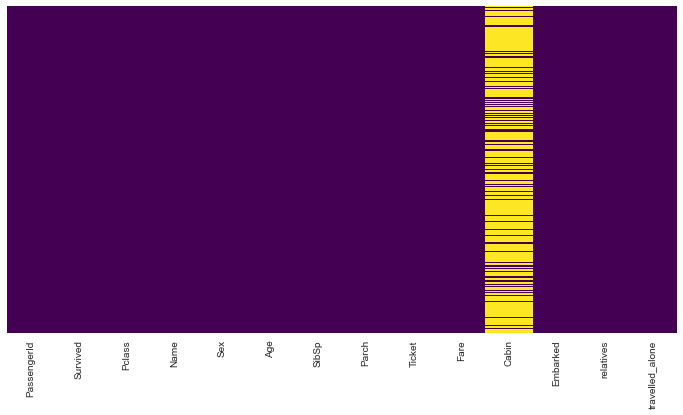

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
relatives            0
travelled_alone      0
dtype: int64


In [50]:
show_na(train)

In [51]:
train[train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,travelled_alone
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,No
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,No


In [52]:
train["Embarked"][55:70]

55      S
56      S
57      C
58      S
59      S
60      C
61    NaN
62      S
63      S
64      C
65      C
66      S
67      S
68      S
69      S
Name: Embarked, dtype: object

In [53]:
train["Embarked"][825:835]

825      Q
826      S
827      C
828      Q
829    NaN
830      C
831      S
832      C
833      S
834      S
Name: Embarked, dtype: object

In [54]:
train["Embarked"].loc[61]="S"
train["Embarked"].loc[829]="S"

C:\Users\memin\AppData\Local\Temp\ipykernel_16748\2818693790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Embarked"].loc[61]="S"
C:\Users\memin\AppData\Local\Temp\ipykernel_16748\2818693790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Embarked"].loc[829]="S"


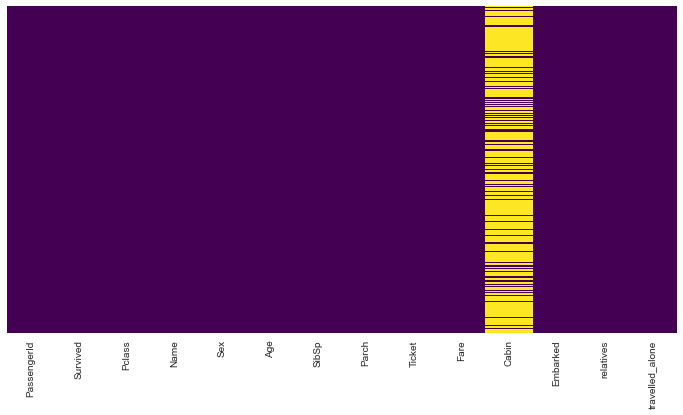

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             0
relatives            0
travelled_alone      0
dtype: int64


In [55]:
show_na(train)

In [56]:
mean= test["Fare"].mean()

In [57]:
test["Fare"].loc[1044]=mean

C:\Users\memin\AppData\Local\Temp\ipykernel_16748\2345519982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Fare"].loc[1044]=mean


In [58]:
train["Name"][559]

'de Messemaeker, Mrs. Guillaume Joseph (Emma)'

In [59]:
train["Name"][886].split()[1]

'Rev.'

In [60]:
train["title"]="Mr"

In [61]:
train.shape[0]

891

In [62]:
for i in range(train.shape[0]):
    
    for a in train["Name"][i].split():
    
        if a == 'Mr.':
            train["title"].loc[i]="Mr"
            print(0, "Mr.")
        elif a == 'Mrs.' :
            train["title"].loc[i]="Mrs"
            print(1,'Mrs.')
        elif a == "Countess." :
            train["title"].loc[i]="Mrs"
            print(1,'Mrs.')    
             
        elif a == "Ms." :
            train["title"].loc[i]="Miss"
            print(2,"Ms.")
        elif a == "Miss." :
            train["title"].loc[i]="Miss"
            print(2,"Miss.")
        elif a== "Dr." :
            train["title"].loc[i]="Dr"
            print(3,"Dr.")
        elif a == "Rev." :
            train["title"].loc[i]="Rev"
            print(4,"Rev.")
        elif a== "Master." :
            train["title"].loc[i]="Master"
            print(5,"Master.")
        elif a== "Mlle." :
            train["title"].loc[i]="Miss"
            print(2,"Mlle.")
        elif a== "Lady." :
            train["title"].loc[i]="Mrs"
            print(1,"Lady.")
        
      

C:\Users\memin\AppData\Local\Temp\ipykernel_16748\1401290665.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["title"].loc[i]="Mr"
C:\Users\memin\AppData\Local\Temp\ipykernel_16748\1401290665.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["title"].loc[i]="Mrs"
C:\Users\memin\AppData\Local\Temp\ipykernel_16748\1401290665.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["title"].loc[i]="Miss"
C:\Users\memin\

0 Mr.
1 Mrs.
2 Miss.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
5 Master.
1 Mrs.
1 Mrs.
2 Miss.
2 Miss.
0 Mr.
0 Mr.
2 Miss.
1 Mrs.
5 Master.
0 Mr.
1 Mrs.
1 Mrs.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
2 Miss.
1 Mrs.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
1 Mrs.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
2 Miss.
1 Mrs.
1 Mrs.
0 Mr.
2 Miss.
2 Miss.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
1 Mrs.
5 Master.
0 Mr.
1 Mrs.
1 Mrs.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
2 Miss.
5 Master.
0 Mr.
2 Miss.
0 Mr.
5 Master.
0 Mr.
5 Master.
1 Mrs.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
5 Master.
2 Miss.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
2 Miss.
1 Mrs.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
2 Miss.
0 Mr.
2 Miss.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
5 Master.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
1 Mrs.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
2 Miss.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Mis

C:\Users\memin\AppData\Local\Temp\ipykernel_16748\1401290665.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["title"].loc[i]="Rev"


5 Master.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
5 Master.
5 Master.
1 Mrs.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
5 Master.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
5 Master.
2 Miss.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
5 Master.
5 Master.
2 Miss.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
2 Miss.
5 Master.
1 Mrs.
2 Miss.
0 Mr.
0 Mr.
2 Miss.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
2 Miss.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
1 Mrs.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
2 Miss.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
2 Miss.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
3 Dr.
2 Miss.
1 Mrs.
0 Mr.
4 Rev.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
1 Mrs.
1 Mrs.
1 Mrs.
2 Miss.
2 Miss.
1 Mrs.
0 Mr.
5 Master.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
2 Miss.
0 Mr.


C:\Users\memin\AppData\Local\Temp\ipykernel_16748\1401290665.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["title"].loc[i]="Dr"


0 Mr.
1 Mrs.
0 Mr.
2 Miss.
2 Miss.
2 Miss.
0 Mr.
5 Master.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
2 Miss.
1 Mrs.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
1 Mrs.
2 Miss.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
5 Master.
2 Miss.
1 Mrs.
0 Mr.
2 Miss.
2 Miss.
2 Miss.
1 Mrs.
0 Mr.
0 Mr.
2 Miss.
1 Mrs.
3 Dr.
2 Miss.
1 Mrs.
0 Mr.
0 Mr.
2 Miss.
1 Mrs.
0 Mr.
2 Miss.
0 Mr.
1 Mrs.
1 Mrs.
2 Miss.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
5 Master.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
2 Miss.
1 Mrs.
5 Master.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
2 Miss.
2 Miss.
2 Miss.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
1 Mrs.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
1 Mrs.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
2 Miss.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
5 Master.
2 Miss.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
1 Mrs.
0 Mr.
2 Miss.
0 Mr.
3 Dr.
1 Mrs.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
5 Master.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
1 Mrs.
1 Mrs.
2 Mi

C:\Users\memin\AppData\Local\Temp\ipykernel_16748\1401290665.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["title"].loc[i]="Miss"


0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
1 Mrs.
1 Mrs.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
5 Master.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
2 Miss.
1 Mrs.
0 Mr.
0 Mr.
5 Master.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
2 Miss.
2 Miss.
2 Miss.
2 Miss.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
1 Mrs.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
1 Mrs.
2 Miss.
2 Miss.
2 Miss.
0 Mr.
2 Miss.
2 Miss.
2 Miss.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
5 Master.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
1 Lady.
0 Mr.
1 Mrs.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
2 Miss.
1 Mrs.
1 Mrs.


C:\Users\memin\AppData\Local\Temp\ipykernel_16748\1401290665.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["title"].loc[i]="Mrs"


0 Mr.
2 Miss.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
2 Miss.
1 Mrs.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
1 Mrs.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
4 Rev.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
3 Dr.
0 Mr.
2 Miss.
2 Miss.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
2 Mlle.
2 Miss.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
2 Miss.
0 Mr.
2 Miss.
2 Miss.


C:\Users\memin\AppData\Local\Temp\ipykernel_16748\1401290665.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["title"].loc[i]="Miss"


0 Mr.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
3 Dr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
1 Mrs.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
2 Miss.
5 Master.
2 Mlle.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
2 Miss.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
2 Miss.
0 Mr.
2 Miss.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
2 Miss.
5 Master.
0 Mr.
0 Mr.
1 Mrs.
5 Master.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
1 Mrs.
3 Dr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.


C:\Users\memin\AppData\Local\Temp\ipykernel_16748\1401290665.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["title"].loc[i]="Mrs"


1 Mrs.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
1 Mrs.
2 Miss.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
5 Master.
5 Master.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
3 Dr.
1 Mrs.
0 Mr.
1 Mrs.
0 Mr.
1 Mrs.
5 Master.
5 Master.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
5 Master.
1 Mrs.
0 Mr.
1 Mrs.
5 Master.
0 Mr.
0 Mr.
5 Master.
0 Mr.
1 Mrs.
1 Mrs.
5 Master.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
4 Rev.
1 Mrs.
5 Master.
0 Mr.
2 Miss.
2 Miss.
1 Mrs.
1 Mrs.
1 Mrs.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
2 Miss.
0 Mr.
1 Mrs.
2 Miss.
0 Mr.
0 Mr.
5 Master.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
1 Mrs.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
1 Mrs.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
1 Mrs.
4 Rev.
2 Miss.
2 Miss.
0 Mr.
0 Mr.


In [63]:
test["Name"].iloc[0]

'Kelly, Mr. James'

In [64]:
test["title"]="Mr"
for i in range(test.shape[0]):
    
    for a in test["Name"].iloc[i].split():
    
        if a == 'Mr.':
            test["title"].iloc[i]="Mr"
            print(0, "Mr.")
        elif a == 'Mrs.' :
            test["title"].iloc[i]="Mrs"
            print(1,'Mrs.')
        elif a == "Countess." :
            test["title"].iloc[i]="Mrs"
            print(1,'Mrs.')    
             
        elif a == "Ms." :
            test["title"].iloc[i]="Miss"
            print(2,"Ms.")
        elif a == "Miss." :
            test["title"].iloc[i]="Miss"
            print(2,"Miss.")
        elif a== "Dr." :
            test["title"].iloc[i]="Dr"
            print(3,"Dr.")
        elif a == "Rev." :
            test["title"].iloc[i]="Rev"
            print(4,"Rev.")
        elif a== "Master." :
            test["title"].iloc[i]="Master"
            print(5,"Master.")
        elif a== "Mlle." :
            test["title"].iloc[i]="Miss"
            print(2,"Mlle.")
        elif a== "Lady." :
            test["title"].iloc[i]="Mrs"
            print(1,"Lady.")
        
        

0 Mr.
1 Mrs.
0 Mr.
0 Mr.


C:\Users\memin\AppData\Local\Temp\ipykernel_16748\1860754013.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["title"].iloc[i]="Mr"
C:\Users\memin\AppData\Local\Temp\ipykernel_16748\1860754013.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["title"].iloc[i]="Mrs"
C:\Users\memin\AppData\Local\Temp\ipykernel_16748\1860754013.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["title"].iloc[i]="Miss"
C:\Users\memin

1 Mrs.
0 Mr.
2 Miss.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
1 Mrs.
1 Mrs.
0 Mr.
0 Mr.
2 Miss.
1 Mrs.
0 Mr.
5 Master.
1 Mrs.
0 Mr.
1 Mrs.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
1 Mrs.
0 Mr.
0 Mr.
2 Miss.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
1 Mrs.
0 Mr.
0 Mr.
2 Miss.
2 Miss.
0 Mr.
5 Master.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
5 Master.
1 Mrs.
2 Miss.
0 Mr.
0 Mr.
1 Mrs.
2 Miss.
0 Mr.
2 Miss.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
2 Miss.
5 Master.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
2 Miss.
2 Ms.
5 Master.
1 Mrs.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
2 Miss.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
2 Miss.
2 Miss.
1 Mrs.
0 Mr.


C:\Users\memin\AppData\Local\Temp\ipykernel_16748\1860754013.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["title"].iloc[i]="Miss"


0 Mr.
2 Miss.
0 Mr.
1 Mrs.
2 Miss.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
2 Miss.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
4 Rev.
1 Mrs.
0 Mr.
0 Mr.
1 Mrs.
5 Master.
0 Mr.
2 Miss.
2 Miss.
0 Mr.
1 Mrs.
2 Miss.
5 Master.
2 Miss.
0 Mr.
4 Rev.
1 Mrs.
0 Mr.
0 Mr.
1 Mrs.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
2 Miss.
0 Mr.
1 Mrs.
1 Mrs.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
1 Mrs.
0 Mr.


C:\Users\memin\AppData\Local\Temp\ipykernel_16748\1860754013.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["title"].iloc[i]="Rev"


2 Miss.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
5 Master.
0 Mr.
5 Master.
0 Mr.
5 Master.
2 Miss.
0 Mr.
1 Mrs.
2 Miss.
5 Master.
2 Miss.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
2 Miss.
0 Mr.
2 Miss.
0 Mr.
1 Mrs.
0 Mr.
2 Miss.
0 Mr.
1 Mrs.
0 Mr.
1 Mrs.
1 Mrs.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
1 Mrs.
1 Mrs.
1 Mrs.
0 Mr.
0 Mr.
5 Master.
0 Mr.
1 Mrs.
0 Mr.
1 Mrs.
1 Mrs.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
2 Miss.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
5 Master.
2 Miss.
2 Miss.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
3 Dr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
1 Mrs.
0 Mr.
5 Master.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
1 Mrs.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
2 Miss.


C:\Users\memin\AppData\Local\Temp\ipykernel_16748\1860754013.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["title"].iloc[i]="Dr"


0 Mr.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
5 Master.
0 Mr.
0 Mr.
0 Mr.
1 Mrs.
5 Master.
2 Miss.
0 Mr.
1 Mrs.
0 Mr.
2 Miss.
1 Mrs.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
1 Mrs.
5 Master.
1 Mrs.
1 Mrs.
0 Mr.
1 Mrs.
1 Mrs.
0 Mr.
2 Miss.
1 Mrs.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
1 Mrs.
2 Miss.
2 Miss.
0 Mr.
0 Mr.
5 Master.
0 Mr.
0 Mr.
1 Mrs.
1 Mrs.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
5 Master.
0 Mr.
1 Mrs.
5 Master.
0 Mr.
0 Mr.
1 Mrs.
0 Mr.
1 Mrs.
0 Mr.
0 Mr.
2 Miss.
0 Mr.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
0 Mr.
2 Miss.
2 Miss.
2 Miss.
1 Mrs.
2 Miss.
0 Mr.
0 Mr.
0 Mr.
5 Master.


In [65]:
survivedvstitle=train[["Survived","title"]].groupby("title").sum().T


In [66]:
survivedvstitle.columns=[["Mr.","Mrs.","Miss.","Dr.","Rev.","Master"]]

In [67]:
survivedvstitle

,Mr.,Mrs.,Miss.,Dr.,Rev.,Master
Survived,3,23,130,85,101,0


In [68]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,travelled_alone,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,1,Yes,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,1,Yes,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,No,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,1,Yes,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,0,No,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,NaN,S,0,No,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,B42,S,0,No,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,NaN,S,3,Yes,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C148,C,0,No,Mr


## dummies

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              891 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            204 non-null    object 
 11  Embarked         891 non-null    object 
 12  relatives        891 non-null    object 
 13  travelled_alone  891 non-null    object 
 14  title            891 non-null    object 
dtypes: float64(2), int64(5), object(8)
memory usage: 104.5+ KB


In [70]:
train.drop(['Name','Ticket'],axis=1,inplace=True)
test.drop(['Name','Ticket'],axis=1,inplace=True)

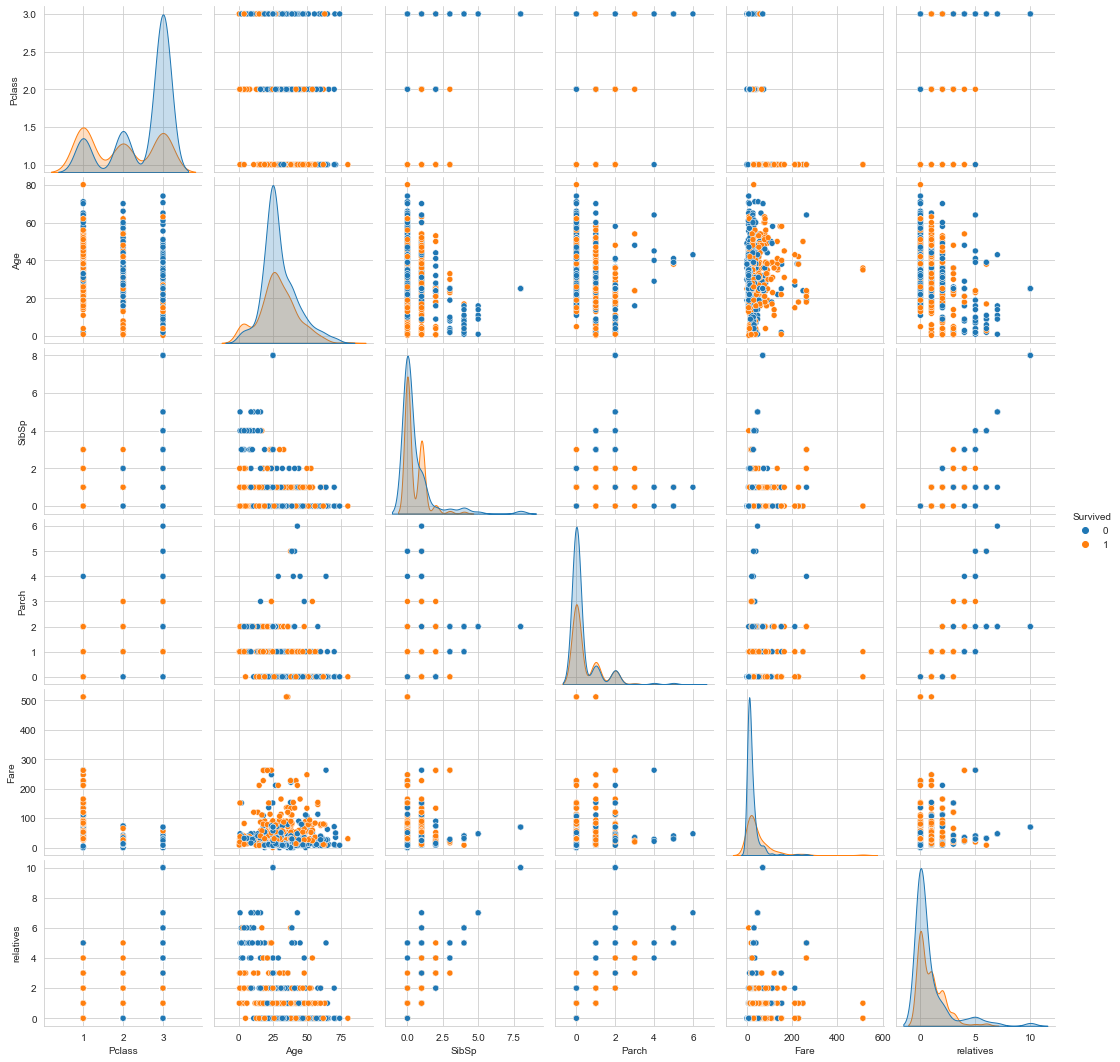

In [71]:
sns.pairplot(data=train.drop("PassengerId",axis=1),hue = "Survived")

In [72]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,travelled_alone,title
PassengerId,,,,,,,,,,,
892,3,male,34.50000,0,0,7.8292,NaN,Q,0,No,Mr
893,3,female,47.00000,1,0,7.0000,NaN,S,1,Yes,Mrs
894,2,male,62.00000,0,0,9.6875,NaN,Q,0,No,Mr
895,3,male,27.00000,0,0,8.6625,NaN,S,0,No,Mr
896,3,female,22.00000,1,1,12.2875,NaN,S,2,Yes,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,male,25.14062,0,0,8.0500,NaN,S,0,No,Mr
1306,1,female,39.00000,0,0,108.9000,C105,C,0,No,Mr
1307,3,male,38.50000,0,0,7.2500,NaN,S,0,No,Mr


In [73]:
sex = pd.get_dummies(train['Sex'],drop_first=True,dtype=int)
embark = pd.get_dummies(train['Embarked'],drop_first=True,dtype=int)
travelled_alone = pd.get_dummies(train['travelled_alone'],drop_first=True,dtype=int)
title = pd.get_dummies(train['title'],drop_first=True,dtype=int)
relatives = pd.get_dummies(train['relatives'],drop_first=True,dtype=int)


C:\Users\memin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [74]:
sex2 = pd.get_dummies(test['Sex'],drop_first=True,dtype=int)
embark2 = pd.get_dummies(test['Embarked'],drop_first=True,dtype=int)
travelled_alone2 = pd.get_dummies(test['travelled_alone'],drop_first=True,dtype=int)
title2 = pd.get_dummies(test['title'],drop_first=True,dtype=int)
relatives2 = pd.get_dummies(test['relatives'],drop_first=True,dtype=int)


In [75]:
train.drop(['Sex','Embarked',"travelled_alone","title","relatives"],axis=1,inplace=True)#"relatives","travelled_alone","title"

In [76]:
test.drop(['Sex','Embarked',"travelled_alone","title","relatives"],axis=1,inplace=True)

In [77]:
train = pd.concat([train,sex,embark,travelled_alone,title,relatives],axis=1)#,relatives,travelled_alone,title

In [78]:
test = pd.concat([test,sex2,embark2,travelled_alone2,title2,relatives2],axis=1)

In [79]:
train["Class*Age"]=train["Age"]*train["Pclass"]
test["Class*Age"]=test["Age"]*test["Pclass"]


In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   male         891 non-null    int32  
 9   Q            891 non-null    int32  
 10  S            891 non-null    int32  
 11  Yes          891 non-null    int32  
 12  Master       891 non-null    int32  
 13  Miss         891 non-null    int32  
 14  Mr           891 non-null    int32  
 15  Mrs          891 non-null    int32  
 16  Rev          891 non-null    int32  
 17  1            891 non-null    int32  
 18  2            891 non-null    int32  
 19  3       

In [81]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,...,Rev,1,2,3,4,5,6,7,10,Class*Age
0,1,0,3,22.0,1,0,7.2500,NaN,1,0,...,0,1,0,0,0,0,0,0,0,66.0
1,2,1,1,38.0,1,0,71.2833,C85,0,0,...,0,1,0,0,0,0,0,0,0,38.0
2,3,1,3,26.0,0,0,7.9250,NaN,0,0,...,0,0,0,0,0,0,0,0,0,78.0
3,4,1,1,35.0,1,0,53.1000,C123,0,0,...,0,1,0,0,0,0,0,0,0,35.0
4,5,0,3,35.0,0,0,8.0500,NaN,1,0,...,0,0,0,0,0,0,0,0,0,105.0


In [82]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S,Yes,...,Rev,1,2,3,4,5,6,7,10,Class*Age
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34.5,0,0,7.8292,NaN,1,1,0,0,...,0,0,0,0,0,0,0,0,0,103.5
893,3,47.0,1,0,7.0000,NaN,0,0,1,1,...,0,1,0,0,0,0,0,0,0,141.0
894,2,62.0,0,0,9.6875,NaN,1,1,0,0,...,0,0,0,0,0,0,0,0,0,124.0
895,3,27.0,0,0,8.6625,NaN,1,0,1,0,...,0,0,0,0,0,0,0,0,0,81.0
896,3,22.0,1,1,12.2875,NaN,0,0,1,1,...,0,0,1,0,0,0,0,0,0,66.0


In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   male         891 non-null    int32  
 9   Q            891 non-null    int32  
 10  S            891 non-null    int32  
 11  Yes          891 non-null    int32  
 12  Master       891 non-null    int32  
 13  Miss         891 non-null    int32  
 14  Mr           891 non-null    int32  
 15  Mrs          891 non-null    int32  
 16  Rev          891 non-null    int32  
 17  1            891 non-null    int32  
 18  2            891 non-null    int32  
 19  3       

## train-test split

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score,permutation_test_score,cross_val_predict

## training model

In [85]:
import warnings
warnings.filterwarnings("ignore")

sns.pairplot(train,hue="Survived")

In [86]:
train.drop("Survived",axis=1).values.shape

(891, 25)

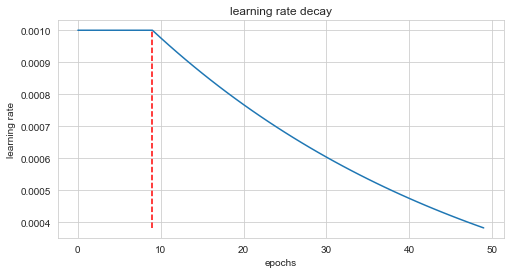

In [87]:
lr = 0.001
epochs = 50
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.024)


def plot_lr_decay(epochs,lr):
    x = np.arange(0,epochs)
    lrs = []
    ylr=lr
    for epoch in x:
        lr =  scheduler(epoch,lr)
        lrs.append(lr)
    y = np.array(lrs)
    plt.figure(figsize=(8,4))
    plt.plot(x,y)
    plt.vlines(x=10-1,linestyles="--",colors="r",ymin=y[-1],ymax=ylr)
    plt.xlabel("epochs")
    plt.ylabel("learning rate")
    plt.title("learning rate decay")
    plt.show()

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
       
        # Check accuracy
        val_acc = 0.91
        
        if (logs.get('val_acc') > val_acc) :

            # Stop if threshold is met
            print(f"\n\nval_acc is reached {val_acc}  so cancelling training!")
            print("")
            self.model.stop_training = True
            

stopCallback = myCallback()
earlyStop = tf.keras.callbacks.EarlyStopping(patience = 20, restore_best_weights = True)
lrDecay = tf.keras.callbacks.LearningRateScheduler(scheduler)
plot_lr_decay(epochs,lr)

In [88]:
def make_model(input_shape):
    model = tf.keras.Sequential([tf.keras.Input(input_shape),
                                 tf.keras.layers.Dense(32,activation="relu",kernel_regularizer="l2"),
                                tf.keras.layers.Dense(32,activation="relu",kernel_regularizer="l2"),
                                tf.keras.layers.Dense(10,activation="relu",kernel_regularizer="l2"),
                                tf.keras.layers.Dense(1,activation="sigmoid")],name = "N_Nets")
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics = ["acc"])
    return model


In [89]:
_=cabin_fillna(cabin,train,test)

In [90]:
train.columns

Index(['PassengerId',    'Survived',      'Pclass',         'Age',
             'SibSp',       'Parch',        'Fare',       'Cabin',
              'male',           'Q',           'S',         'Yes',
            'Master',        'Miss',          'Mr',         'Mrs',
               'Rev',             1,             2,             3,
                   4,             5,             6,             7,
                  10,   'Class*Age'],
      dtype='object')

In [91]:
cols =  ['Fare','Parch','male',         'Q',         'S',
             'Yes',    'Master',      'Miss',        'Mr',       'Mrs',
             'Rev',           1,           2,           3,           4,
                 5,           6,           7,          10, 'Class*Age']

In [92]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,...,Rev,1,2,3,4,5,6,7,10,Class*Age
0,1,0,3,22.00000,1,0,7.2500,143,1,0,...,0,1,0,0,0,0,0,0,0,66.000000
1,2,1,1,38.00000,1,0,71.2833,83,0,0,...,0,1,0,0,0,0,0,0,0,38.000000
2,3,1,3,26.00000,0,0,7.9250,122,0,0,...,0,0,0,0,0,0,0,0,0,78.000000
3,4,1,1,35.00000,1,0,53.1000,57,0,0,...,0,1,0,0,0,0,0,0,0,35.000000
4,5,0,3,35.00000,0,0,8.0500,152,1,0,...,0,0,0,0,0,0,0,0,0,105.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.00000,0,0,13.0000,149,1,0,...,1,0,0,0,0,0,0,0,0,54.000000
887,888,1,1,19.00000,0,0,30.0000,31,0,0,...,0,0,0,0,0,0,0,0,0,19.000000
888,889,0,3,25.14062,1,2,23.4500,144,0,0,...,0,0,0,1,0,0,0,0,0,75.421859
889,890,1,1,26.00000,0,0,30.0000,62,1,0,...,0,0,0,0,0,0,0,0,0,26.000000


In [93]:
def plot_loss_acc(history,y_true,prediction):
    _,ax = plt.subplots( ncols=3,nrows=1,figsize=(20,3))
    ax[1].set_xlabel("epochs")
    ax[1].set_ylabel("loss")
    ax[1].set_title("final val_loss %1.4f"%(history.history["val_loss"][-1:][0]))
    ax[2].set_xlabel("epochs")
    ax[2].set_ylabel("auc")
    ax[2].set_title("final val_acc %1.4f"%(history.history["val_acc"][-1:][0]))
    ax[0].set_xlabel("epochs")
    ax[0].set_ylabel("learning rate")
    ax[0].set_title("final lr %1.4f"%(history.history["lr"][-1:][0]))
   
    pd.DataFrame([history.history["lr"]],index=["learning rate"]).T.plot(ax=ax[0])
    pd.DataFrame([history.history["acc"],history.history["val_acc"]],index=["auc","val_acc"]).T.plot(ax=ax[2])
    pd.DataFrame([history.history["loss"],history.history["val_loss"]],index=["loss","val_loss"]).T.plot(ax=ax[1])
    plt.show()

In [94]:
def plot_cm(y_true, prediction, p=0.5):
    cm = confusion_matrix(y_true, prediction > p)
    plt.figure(figsize=(3,3))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    print('\nNot Survived Detected (True Negatives): ', cm[0][0])
    print('Not Survived Incorrectly Detected (False Positives): ', cm[0][1])
    print('Survived Missed (False Negatives): ', cm[1][0])
    print('Survived Detected (True Positives): ', cm[1][1])
    print('Total Survived: ', np.sum(cm[1]))
    plt.show()


In [95]:
scaler = StandardScaler()

X=train[cols]
y=train['Survived']
scaler.fit(X)
X = scaler.transform(X)
test2 = scaler.transform(test[cols])

In [96]:
input_shape=X.shape[1]

###############processing fold  0 ###############
Epoch 1/50
357/357 [==============================] - 1s 1ms/step - loss: 1.0062 - acc: 0.7602 - val_loss: 0.8354 - val_acc: 0.7865 - lr: 0.0010
Epoch 2/50
357/357 [==============================] - 0s 918us/step - loss: 0.7094 - acc: 0.8107 - val_loss: 0.6833 - val_acc: 0.7865 - lr: 0.0010
Epoch 3/50
357/357 [==============================] - 0s 807us/step - loss: 0.6087 - acc: 0.8205 - val_loss: 0.6148 - val_acc: 0.8315 - lr: 0.0010
Epoch 4/50
357/357 [==============================] - 0s 834us/step - loss: 0.5608 - acc: 0.8233 - val_loss: 0.5750 - val_acc: 0.8315 - lr: 0.0010
Epoch 5/50
357/357 [==============================] - 0s 842us/step - loss: 0.5245 - acc: 0.8219 - val_loss: 0.5401 - val_acc: 0.8427 - lr: 0.0010
Epoch 6/50
357/357 [==============================] - 0s 799us/step - loss: 0.5068 - acc: 0.8247 - val_loss: 0.5394 - val_acc: 0.8258 - lr: 0.0010
Epoch 7/50
357/357 [==============================] - 0s 802us/step - 

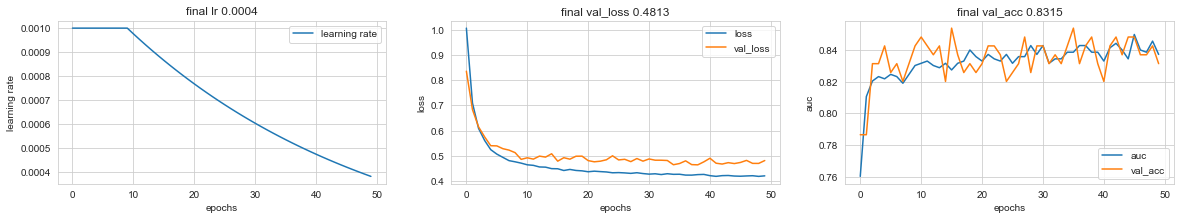


Not Survived Detected (True Negatives):  102
Not Survived Incorrectly Detected (False Positives):  17
Survived Missed (False Negatives):  13
Survived Detected (True Positives):  46
Total Survived:  59


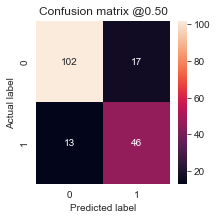

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       119
           1       0.73      0.78      0.75        59

    accuracy                           0.83       178
   macro avg       0.81      0.82      0.81       178
weighted avg       0.83      0.83      0.83       178

###############processing fold  1 ###############
Epoch 1/50
357/357 [==============================] - 1s 1ms/step - loss: 0.9967 - acc: 0.7994 - val_loss: 0.8268 - val_acc: 0.8315 - lr: 0.0010
Epoch 2/50
357/357 [==============================] - 0s 807us/step - loss: 0.7413 - acc: 0.8345 - val_loss: 0.6921 - val_acc: 0.8371 - lr: 0.0010
Epoch 3/50
357/357 [==============================] - 0s 806us/step - loss: 0.6375 - acc: 0.8345 - val_loss: 0.6186 - val_acc: 0.8258 - lr: 0.0010
Epoch 4/50
357/357 [==============================] - 0s 898us/step - loss: 0.5794 - acc: 0.8345 - val_loss: 0.5710 - val_acc: 0.8371 - lr: 0.0010
Epoch 5/50
357/357 [=================

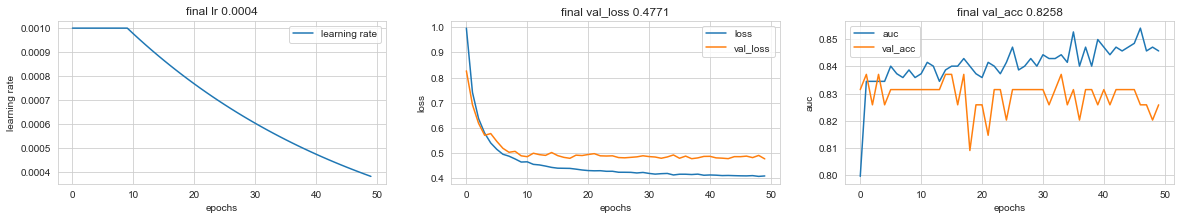


Not Survived Detected (True Negatives):  90
Not Survived Incorrectly Detected (False Positives):  10
Survived Missed (False Negatives):  21
Survived Detected (True Positives):  57
Total Survived:  78


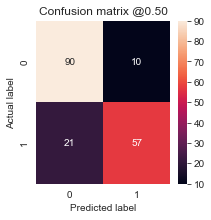

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       100
           1       0.85      0.73      0.79        78

    accuracy                           0.83       178
   macro avg       0.83      0.82      0.82       178
weighted avg       0.83      0.83      0.82       178

###############processing fold  2 ###############
Epoch 1/50
357/357 [==============================] - 1s 994us/step - loss: 0.9878 - acc: 0.8093 - val_loss: 0.8190 - val_acc: 0.8090 - lr: 0.0010
Epoch 2/50
357/357 [==============================] - 0s 793us/step - loss: 0.7106 - acc: 0.8331 - val_loss: 0.6876 - val_acc: 0.8146 - lr: 0.0010
Epoch 3/50
357/357 [==============================] - 0s 792us/step - loss: 0.6065 - acc: 0.8373 - val_loss: 0.6160 - val_acc: 0.8146 - lr: 0.0010
Epoch 4/50
357/357 [==============================] - 0s 791us/step - loss: 0.5521 - acc: 0.8359 - val_loss: 0.5851 - val_acc: 0.8090 - lr: 0.0010
Epoch 5/50
357/357 [===============

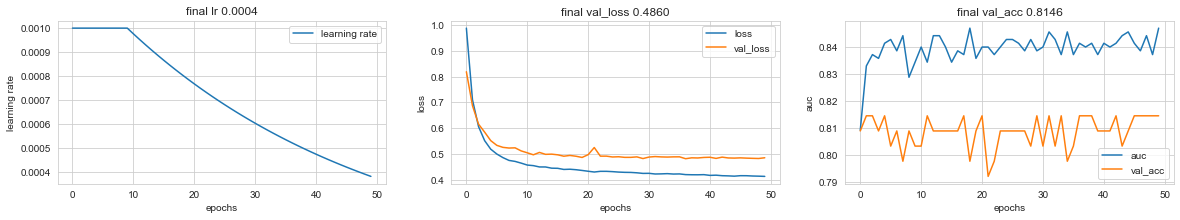


Not Survived Detected (True Negatives):  97
Not Survived Incorrectly Detected (False Positives):  11
Survived Missed (False Negatives):  22
Survived Detected (True Positives):  48
Total Survived:  70


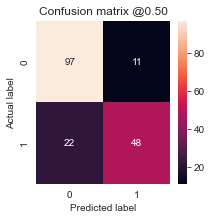

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       108
           1       0.81      0.69      0.74        70

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178

###############processing fold  3 ###############
Epoch 1/50
357/357 [==============================] - 1s 1ms/step - loss: 0.9645 - acc: 0.7868 - val_loss: 0.8064 - val_acc: 0.7865 - lr: 0.0010
Epoch 2/50
357/357 [==============================] - 0s 867us/step - loss: 0.6658 - acc: 0.8443 - val_loss: 0.6968 - val_acc: 0.7809 - lr: 0.0010
Epoch 3/50
357/357 [==============================] - 0s 940us/step - loss: 0.5775 - acc: 0.8373 - val_loss: 0.6417 - val_acc: 0.7921 - lr: 0.0010
Epoch 4/50
357/357 [==============================] - 0s 847us/step - loss: 0.5304 - acc: 0.8401 - val_loss: 0.6028 - val_acc: 0.7921 - lr: 0.0010
Epoch 5/50
357/357 [=================

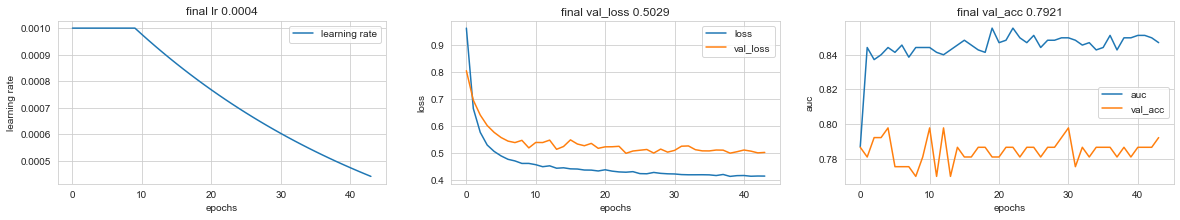


Not Survived Detected (True Negatives):  96
Not Survived Incorrectly Detected (False Positives):  11
Survived Missed (False Negatives):  28
Survived Detected (True Positives):  43
Total Survived:  71


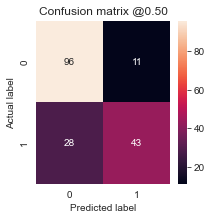

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       107
           1       0.80      0.61      0.69        71

    accuracy                           0.78       178
   macro avg       0.79      0.75      0.76       178
weighted avg       0.78      0.78      0.77       178

###############processing fold  4 ###############
Epoch 1/50
357/357 [==============================] - 1s 1ms/step - loss: 1.0433 - acc: 0.7489 - val_loss: 0.7436 - val_acc: 0.8596 - lr: 0.0010
Epoch 2/50
357/357 [==============================] - 0s 819us/step - loss: 0.7132 - acc: 0.8177 - val_loss: 0.5761 - val_acc: 0.8708 - lr: 0.0010
Epoch 3/50
357/357 [==============================] - 0s 847us/step - loss: 0.6120 - acc: 0.8219 - val_loss: 0.5140 - val_acc: 0.8708 - lr: 0.0010
Epoch 4/50
357/357 [==============================] - 0s 863us/step - loss: 0.5629 - acc: 0.8247 - val_loss: 0.4696 - val_acc: 0.8652 - lr: 0.0010
Epoch 5/50
357/357 [=================

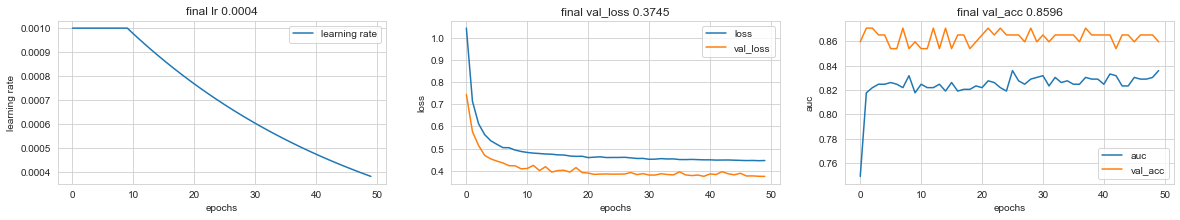


Not Survived Detected (True Negatives):  103
Not Survived Incorrectly Detected (False Positives):  11
Survived Missed (False Negatives):  14
Survived Detected (True Positives):  50
Total Survived:  64


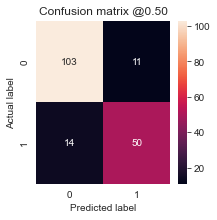

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       114
           1       0.82      0.78      0.80        64

    accuracy                           0.86       178
   macro avg       0.85      0.84      0.85       178
weighted avg       0.86      0.86      0.86       178



In [97]:
k = 5
num_val_samples = len(X) // k
all_scores = []
test_preds = []
for i in range(k):
    print("#"*15+'processing fold ', i,15*"#")
    val_data = X[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
                                        [X[:i * num_val_samples],
                                        X[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_y = np.concatenate(
                                            [y[:i * num_val_samples],
                                            y[(i + 1) * num_val_samples:]],
                                            axis=0)
    model = make_model(input_shape)
    history = model.fit(partial_train_data, partial_y, epochs=epochs,
              validation_data=(val_data,val_targets), batch_size=2,
              callbacks = [earlyStop,lrDecay,stopCallback])
    
    prediction = (model.predict(val_data).squeeze()>0.5).astype(int)
    conf_mat = confusion_matrix(val_targets,prediction)  
    class_rep = classification_report(val_targets,prediction)
    prediction_test = model.predict(test2).squeeze()
    f1 =  f1_score(val_targets,prediction)
    acc = accuracy_score(val_targets,prediction)
    all_scores.append(history.history["val_acc"][-1:][0])
    test_preds.append(prediction_test.tolist())
    plot_loss_acc(history,val_targets,prediction)
    plot_cm(val_targets, prediction, p=0.5)
    print(class_rep)

In [98]:
print(f"cv score : {np.array(all_scores).mean():.3f}")

cv score : 0.825


In [99]:
np.array(test_preds)

array([[0.11094964, 0.40633652, 0.09936866, ..., 0.08962971, 0.10870096,
        0.81210411],
       [0.08604586, 0.1443834 , 0.0812526 , ..., 0.08473471, 0.10147947,
        0.89788651],
       [0.08197013, 0.12451506, 0.07432112, ..., 0.07669979, 0.09724984,
        0.83126962],
       [0.11484158, 0.23583755, 0.10827294, ..., 0.10772753, 0.13154319,
        0.74649417],
       [0.10543367, 0.20737699, 0.10070896, ..., 0.1015256 , 0.12015867,
        0.77630705]])

In [100]:
pred_mean = np.array(test_preds).mean(axis=0)

In [101]:
pred_mean.shape

(418,)

In [102]:
gender_submission["Survived"]=(pred_mean>0.5).astype(int)

In [103]:
gender_submission.to_csv("submission.csv",index=False)

In [104]:
!head submission.csv

'head' is not recognized as an internal or external command,
operable program or batch file.
